Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import haversine as hs

Loading the data

In [2]:
bike_df = pd.read_csv("201902-fordgobike-tripdata.csv")
bike_df.shape

(183412, 16)

# Assessing Data

In [3]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

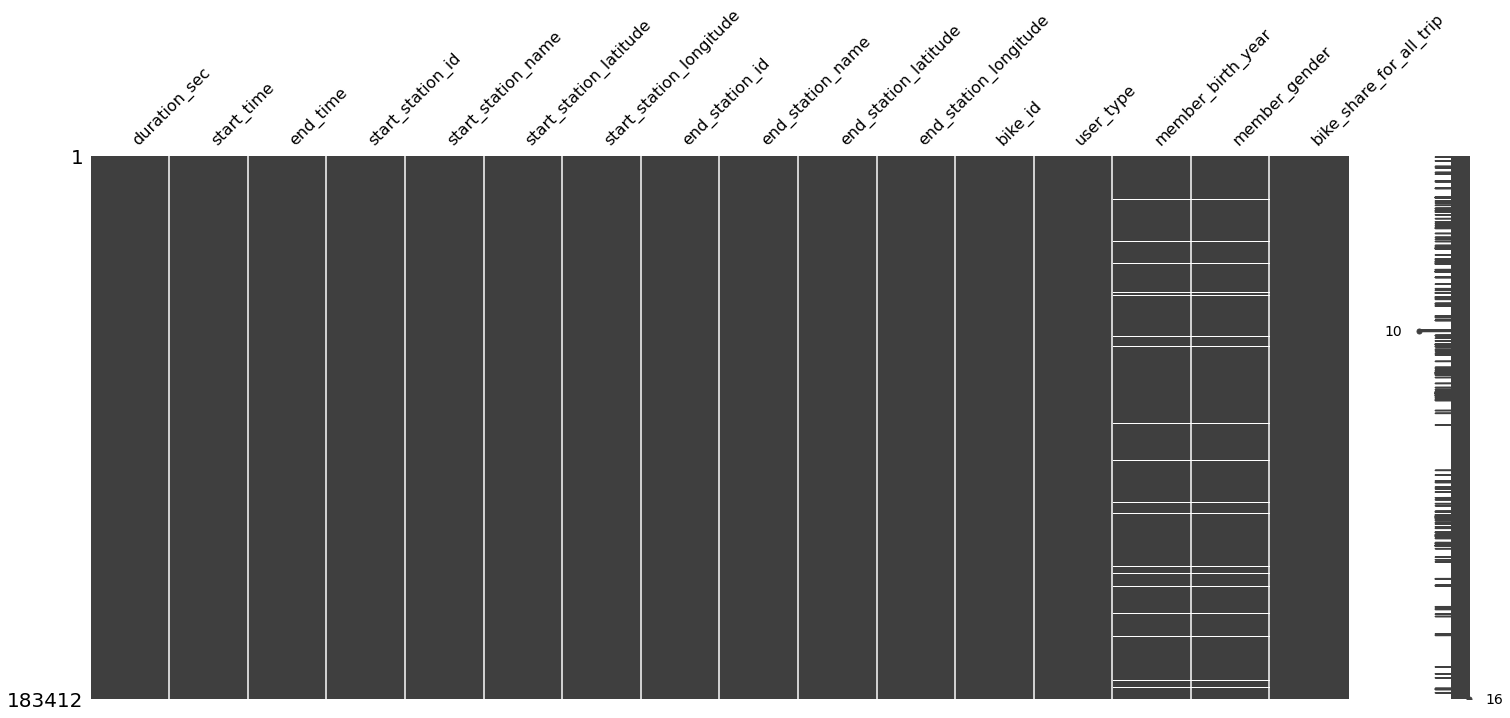

In [5]:
import missingno as msno
msno.matrix(bike_df);

Missing data in columns:


*   start_station_id
*   start_station_name
*   end_station_id
*   end_station_name
*   member_birth_year
*   member_gender





from the matrix, its probably the same people with missing member_birth_year who have missing member_gender.

In [6]:
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [7]:
bike_df['start_station_id'].nunique()

329

In [8]:
bike_df['end_station_id'].nunique()

329

In [9]:
bike_df['start_station_latitude'].nunique()

334

Incorrect datatypes for columns:

*   start_time
*   end_time



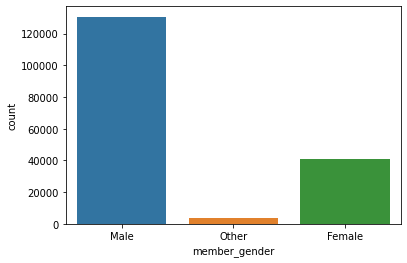

In [10]:
sns.countplot(
    data = bike_df,
    x = 'member_gender'
);

We have more Males in the dataset than the other 2 gender types

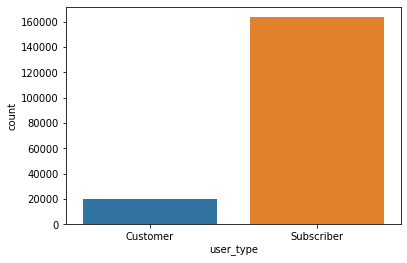

In [11]:
sns.countplot(
    data = bike_df,
    x = 'user_type'
);

There are about 8-times more rides by Subscribers than Customers

In [12]:
bike_df['bike_id'].nunique()

4646

There are 4646 different bicycles in this dataset.


In [13]:
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [14]:
share_trip_counts = bike_df['bike_share_for_all_trip'].value_counts()

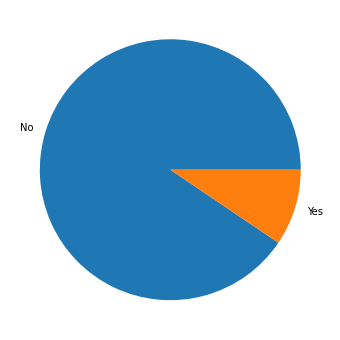

In [15]:
plt.figure(figsize=(6,6))
plt.pie(
    share_trip_counts,
    labels = share_trip_counts.index
);

Majority of people preferred not to share bikes in this particular period.

What was the relationship between bike_sharing and user_type?

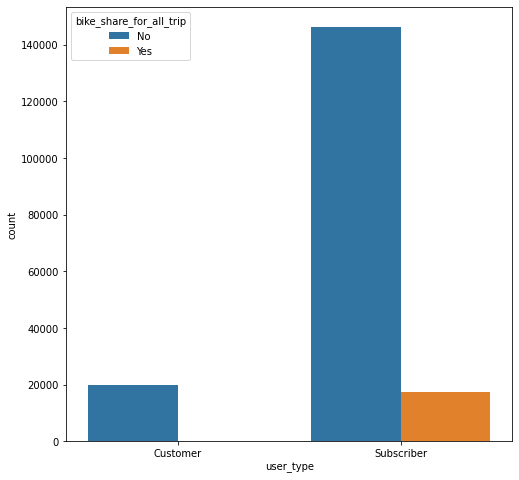

In [96]:
plt.figure(figsize=(8,8))
sns.countplot(
    data = bike_df,
    x = 'user_type',
    hue = 'bike_share_for_all_trip'
);

It seems there was no sharing at all for the Customer user type.

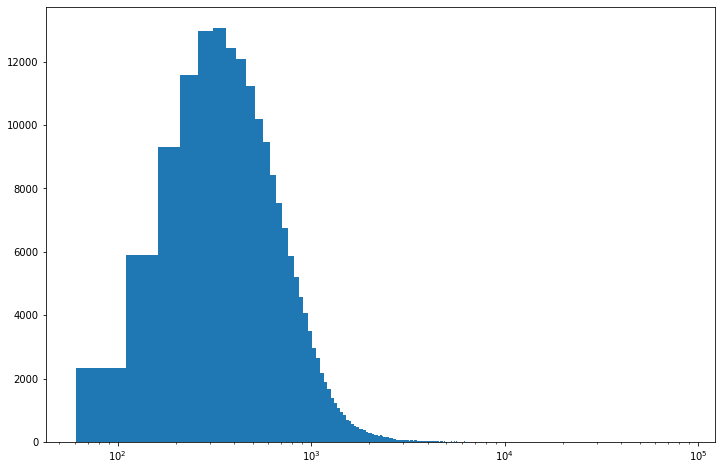

In [16]:
bins = np.arange(bike_df['duration_sec'].min(), bike_df['duration_sec'].max() , 50)
plt.figure(figsize=(12,8))
plt.xscale('log')
plt.hist(
    data = bike_df,
    x = 'duration_sec',
    bins = bins
);

# Cleaning Data

We will make a copy of the dataset first

## Define
correct datatypes for start_time and end_time

In [17]:
bike_clean = bike_df.copy()

## Code

In [18]:
bike_clean['start_time'] = pd.to_datetime(bike_clean['start_time'])
bike_clean['end_time'] = pd.to_datetime(bike_clean['end_time'])

## Test

In [19]:
print(bike_clean['start_time'].dtype)
print(bike_clean['end_time'].dtype)

datetime64[ns]
datetime64[ns]


## Define
Drop missing data for columns:
start_station_id
start_station_name
end_station_id
end_station_name
member_birth_year
member_gender

## Code

In [20]:
bike_clean.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [21]:
bike_clean.shape

(183412, 16)

In [22]:
# Missing data is just 4.5% of the whole dataset, so we will drop it for now
bike_clean.dropna(inplace=True)

## Test

In [23]:
bike_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

## Define
Compute Age from member_birth_year column, and drop the column

In [24]:
#we will use the start_time of the trip, to compute member age at the time they took the trip
bike_clean['start_time'].max().year

2019

In [25]:
bike_clean['member_age'] = bike_clean['start_time'].dt.year - bike_clean['member_birth_year']

In [26]:
#change member_age data type to int, then drop member_birth_year column
bike_clean['member_age'] = bike_clean['member_age'].astype(int)

In [27]:
bike_clean.drop(columns=['member_birth_year'], inplace=True)


## Test

In [28]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

## Define

Change datatypes for end_station_id, start_station_id to int

## Code

In [29]:
bike_clean['start_station_id'] = bike_clean['start_station_id'].astype(int)
bike_clean['end_station_id'] = bike_clean['end_station_id'].astype(int)


## Test

In [30]:
bike_clean['start_station_id'].dtype

dtype('int32')

In [31]:
bike_clean['end_station_id'].dtype

dtype('int32')

## Feature Engineering

### Define
Creating a new feature called start_trip_date from start_trip_time 

### Code

In [32]:
bike_clean['start_trip_date'] = pd.to_datetime(bike_clean['start_time']).dt.date

In [33]:
bike_clean.loc[0, 'start_trip_date']

datetime.date(2019, 2, 28)

### Test

In [34]:
bike_clean['start_trip_date']

0         2019-02-28
2         2019-02-28
3         2019-02-28
4         2019-02-28
5         2019-02-28
             ...    
183407    2019-02-01
183408    2019-02-01
183409    2019-02-01
183410    2019-02-01
183411    2019-02-01
Name: start_trip_date, Length: 174952, dtype: object

In [35]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

## Define
Extract distance between start_station and end_station

## Code

In [36]:
distances = []
for ind in bike_clean.index:
	loc1 = (bike_clean['start_station_latitude'][ind], bike_clean['start_station_longitude'][ind])
	loc2 = (bike_clean['end_station_latitude'][ind], bike_clean['end_station_longitude'][ind])
	distance = np.round(hs.haversine(loc1, loc2),2)
	distances.append(distance)


In [37]:
distances[1]

2.7

In [38]:
bike_clean['trip_distance'] = distances

## Test

In [39]:
bike_clean['trip_distance'].describe()

count    174952.000000
mean          1.690052
std           1.097011
min           0.000000
25%           0.910000
50%           1.430000
75%           2.220000
max          69.470000
Name: trip_distance, dtype: float64

# Exploratory Data Analysis

In [40]:
bike_clean['member_age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

The maximum bike rider age is an outlier, @ 141.

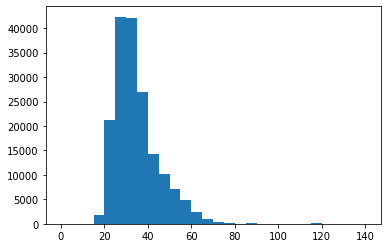

In [41]:
bins = np.arange(0, bike_clean['member_age'].max(), 5)

plt.hist(
    data = bike_clean,
    x = 'member_age',
    bins = bins
);

Unimodal distribution in Age, which is right-skewed

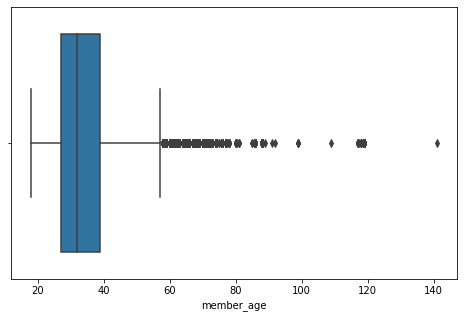

In [42]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data = bike_clean,
    x = 'member_age',
);

There is a significant number of outliers in the Age column, with the highest age at 141.??

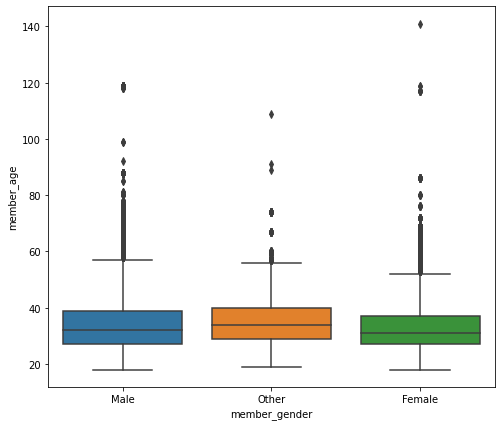

In [43]:
plt.figure(figsize=(8,7))
sns.boxplot(
    data = bike_clean,
    x = 'member_gender',
    y = 'member_age',
    orient = 'v'  
);

The outliers span across the different gender groups.

In [44]:
bike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,start_trip_date,trip_distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,35,2019-02-28,0.54
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,47,2019-02-28,2.70
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,30,2019-02-28,0.26
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,45,2019-02-28,2.41
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,Male,No,60,2019-02-28,3.33


In [45]:
bike_clean.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,start_trip_date,trip_distance
175020,558,2019-02-02 15:50:00.113,2019-02-02 15:59:18.344,122,19th St at Mission St,37.760299,-122.418892,62,Victoria Manalo Draves Park,37.777791,-122.406432,5416,Subscriber,Male,No,30,2019-02-02,2.23
85709,389,2019-02-17 14:35:26.900,2019-02-17 14:41:56.759,74,Laguna St at Hayes St,37.776435,-122.426244,98,Valencia St at 16th St,37.765052,-122.421866,5555,Subscriber,Male,No,24,2019-02-17,1.32
175791,780,2019-02-02 13:19:24.459,2019-02-02 13:32:24.539,99,Folsom St at 15th St,37.767037,-122.415442,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,5024,Subscriber,Female,No,32,2019-02-02,2.16
78413,565,2019-02-18 19:38:24.692,2019-02-18 19:47:50.422,109,17th St at Valencia St,37.763316,-122.421904,119,18th St at Noe St,37.761047,-122.432642,4728,Subscriber,Male,No,35,2019-02-18,0.98
72876,462,2019-02-19 15:28:13.111,2019-02-19 15:35:55.369,134,Valencia St at 24th St,37.752428,-122.420628,106,Sanchez St at 17th St,37.763242,-122.430675,4553,Subscriber,Female,No,35,2019-02-19,1.49
160615,711,2019-02-05 16:45:28.114,2019-02-05 16:57:19.687,89,Division St at Potrero Ave,37.769218,-122.407646,22,Howard St at Beale St,37.789756,-122.394643,5265,Subscriber,Male,No,44,2019-02-05,2.55
8765,827,2019-02-28 08:00:38.674,2019-02-28 08:14:25.836,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,104,4th St at 16th St,37.767045,-122.390833,4364,Subscriber,Female,No,25,2019-02-28,2.86
133529,657,2019-02-08 18:47:42.940,2019-02-08 18:58:40.163,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,91,Berry St at King St,37.771762,-122.398438,4803,Subscriber,Female,No,24,2019-02-08,2.65
167454,632,2019-02-04 17:11:50.536,2019-02-04 17:22:23.229,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,36,Folsom St at 3rd St,37.783830,-122.398870,5216,Subscriber,Male,No,48,2019-02-04,1.35
20381,88,2019-02-26 12:57:40.043,2019-02-26 12:59:08.551,42,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,6119,Subscriber,Male,No,39,2019-02-26,0.20


In [46]:
bike_clean.reset_index(drop=True, inplace=True)

In [47]:
bike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,start_trip_date,trip_distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,35,2019-02-28,0.54
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,47,2019-02-28,2.70
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,30,2019-02-28,0.26
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,45,2019-02-28,2.41
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,Male,No,60,2019-02-28,3.33


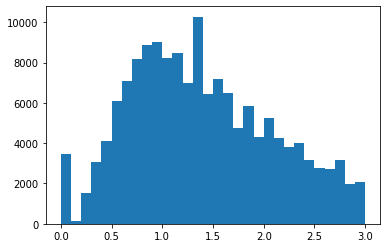

In [48]:
step_d = 0.1 #step distance
bins = np.arange(0, 3 + step_d, step = step_d)
plt.hist(
    data = bike_clean,
     x = 'trip_distance',
     bins = bins
);


It might be that those with total trip distances of zero, ended where their trips started.

In [49]:
df_trip_zero = bike_clean.query('trip_distance == 0')

In [50]:
df_trip_zero[['start_station_name', 'end_station_name']].sample(10)

,start_station_name,end_station_name
164323,Garfield Square (25th St at Harrison St),Garfield Square (25th St at Harrison St)
38015,Davis St at Jackson St,Davis St at Jackson St
154734,University Ave at Oxford St,University Ave at Oxford St
34851,Post St at Kearny St,Post St at Kearny St
113877,Myrtle St at Polk St,Myrtle St at Polk St
122613,Jersey St at Church St,Jersey St at Church St
163724,MLK Jr Way at 14th St,MLK Jr Way at 14th St
146471,University Ave at Oxford St,University Ave at Oxford St
164896,San Pablo Park,San Pablo Park
94731,Fountain Alley at S 2nd St,Fountain Alley at S 2nd St


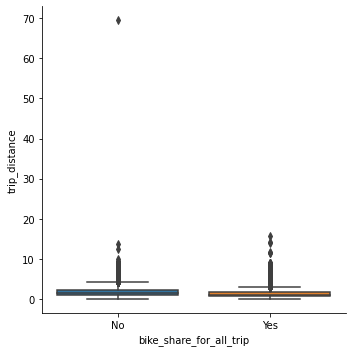

In [51]:
sns.catplot(
    data = bike_clean,
    x = 'bike_share_for_all_trip',
    y = 'trip_distance',
    kind = 'box'
);

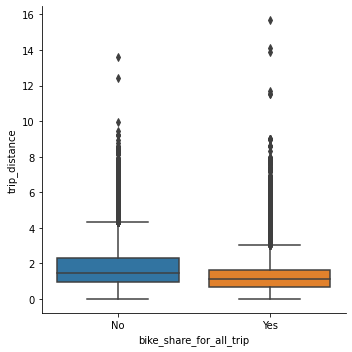

In [52]:
#cutting out the 70 kms trip distance
sns.catplot(
    data = bike_clean.query('trip_distance < 50'),
    x = 'bike_share_for_all_trip',
    y = 'trip_distance',
    kind = 'box'
);


They are outliers as well in the distance covered on trips. The median distance covered for those sharing bikes, and those who aren't is below 2 kms.

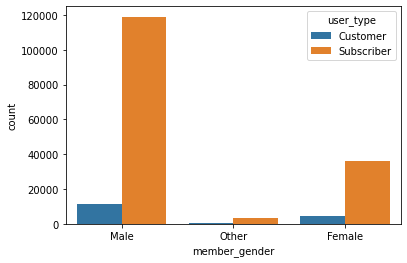

In [53]:
sns.countplot(
    data = bike_clean,
    x = 'member_gender',
    hue = 'user_type'
);

## Interesting features to be used in analysis:

### Qualitative features:


*   user_type
*   member_gender
*   bike_share_for_all_trip

### Quantitative features:
*   member_age
*   duration_sec

### Geographic features
*   start_station_longitude
*   start_station_latitude
*   end_station_longitude
*   end_station_latitude

### Time Series
*   start_time
*   trip_start_date
*   end_time




# Explanatory Data Analysis

## Question 1:

Is there a relationship between gender and duration of rides?

## Visualization

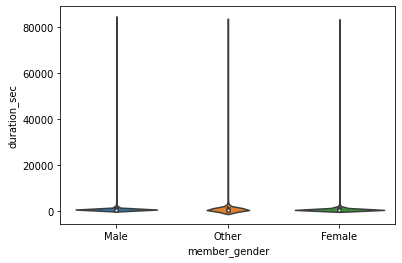

In [54]:
sns.violinplot(
    data = bike_clean,
    x = 'member_gender',
    y = 'duration_sec'
);

There are certainly some heavy riders compared to the rest of the crowd.
Lets exclude these outliers.

In [55]:
bike_clean['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

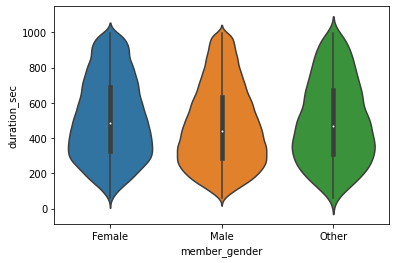

In [56]:
sns.violinplot(
    data = bike_clean[bike_clean['duration_sec'] < 1000],
    x = 'member_gender',
    y = 'duration_sec'
);

There is not really much of a difference in the distributions above, although the average riding time for males seems to be the least in the gender group.

In [57]:
#lets subset for riders with less than 1000 seconds in time duration
df_1000_less = bike_clean.query('duration_sec < 1000')

In [58]:
#group by gender
grouped_gender_duration = df_1000_less.groupby('member_gender')['duration_sec'].mean()
grouped_gender_duration.sort_values(ascending=False)

member_gender
Female    512.656786
Other     494.259259
Male      470.862369
Name: duration_sec, dtype: float64

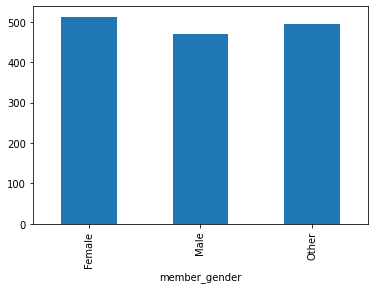

In [59]:
grouped_gender_duration.plot(kind='bar');

## Observation
Females tend to take more time on average during their rides than the Male and Other gender types. Males take the least time.

## Question 2
Do bike ride times decrease with age?

## Visualization

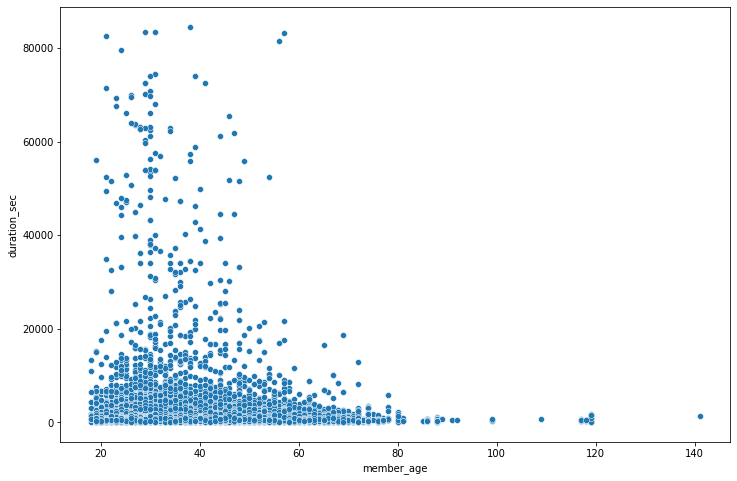

In [60]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    data = bike_clean,
    x = 'member_age',
    y = 'duration_sec'
);

The majority of the data is for age < 80 and duration less than 20k. Lets investigate that.

In [61]:
cut_df = bike_clean.loc[(bike_clean['member_age'] <= 80) & (bike_clean['duration_sec'] <= 20000)]

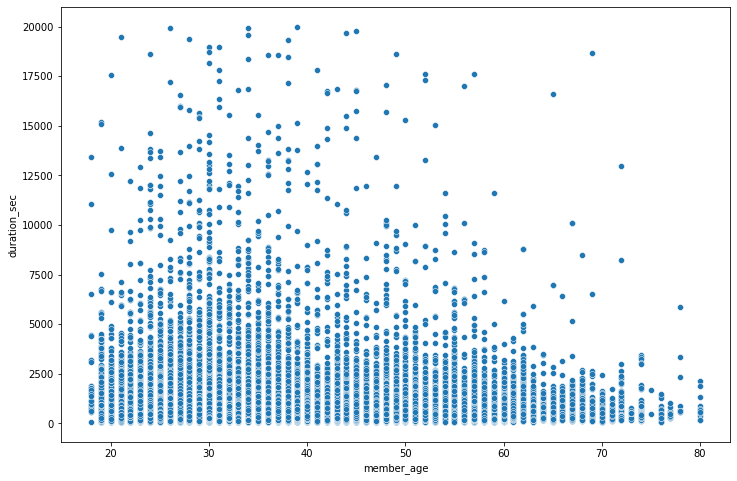

In [62]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    data = cut_df,
    x = 'member_age',
    y = 'duration_sec'
);

In [63]:
#lets get a subset of about 500 points of the cut_df
df_subset = cut_df.sample(500)


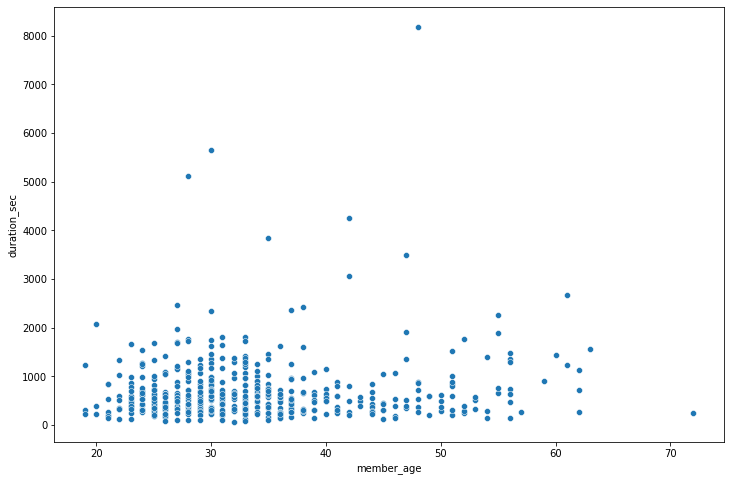

In [64]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    data = df_subset,
    x = 'member_age',
    y = 'duration_sec'
);

## Observation

The correlation between Age and Duration of rides seems to be very weak.

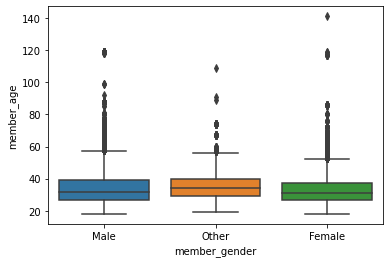

In [65]:
sns.boxplot(
    data = bike_clean,
    x = 'member_gender',
    y = 'member_age'
);

Time Series Analysis

In [66]:
#introducing number_of_bikes column for easy aggregation
bike_clean['number_of_bikes'] = 1

In [67]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [68]:
day_1 = bike_clean['start_trip_date'][0]
day_1.year, day_1.month, day_1.day

(2019, 2, 28)

In [69]:
bike_clean['start_trip_date'][0]

datetime.date(2019, 2, 28)

In [70]:
bike_clean['start_trip_date'].min()

datetime.date(2019, 2, 1)

In [71]:
bike_clean['start_trip_date'].max()

datetime.date(2019, 2, 28)

In [72]:
bike_clean['start_time'].duplicated().sum()

11

In [73]:
time_df = bike_clean.groupby([pd.Grouper(key='start_time', freq='D')]).agg(unique_bikes=('bike_id', 'nunique'),
         total_bikes = ('number_of_bikes','sum'),
         total_trip_time = ('duration_sec','sum'),
         total_trip_distance = ('trip_distance', 'sum'))

In [74]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 2019-02-01 to 2019-02-28
Freq: D
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unique_bikes         28 non-null     int64  
 1   total_bikes          28 non-null     int64  
 2   total_trip_time      28 non-null     int64  
 3   total_trip_distance  28 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.1 KB


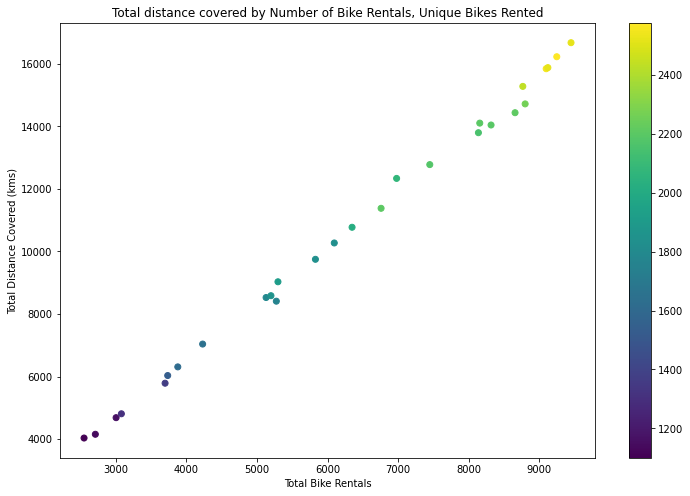

In [75]:
plt.figure(figsize=(12,8))
plt.scatter(
    data = time_df,
    x = 'total_bikes',
    y = 'total_trip_distance',
    c = 'unique_bikes'
);
plt.title('Total distance covered by Number of Bike Rentals, Unique Bikes Rented')
plt.xlabel('Total Bike Rentals')
plt.ylabel('Total Distance Covered (kms)')
plt.colorbar();

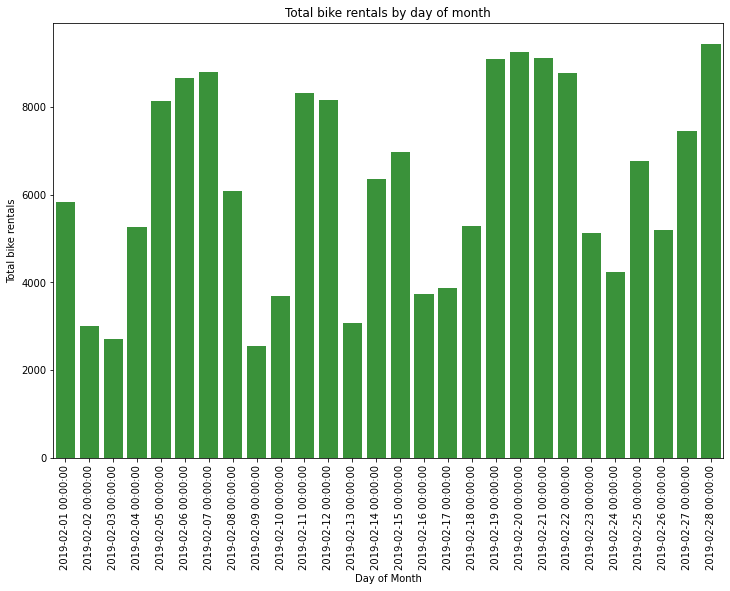

In [76]:
plt.figure(figsize=(12,8))
base_color = sns.color_palette()[2]
sns.barplot(
    data = time_df,
    x = time_df.index,
    y = 'total_bikes',
    color = base_color
);
plt.title("Total bike rentals by day of month")
plt.ylabel("Total bike rentals")
plt.xlabel("Day of Month")
plt.xticks(rotation=90);

In [77]:
bike_clean.groupby([pd.Grouper(key='start_time', freq='W'), 'user_type']).number_of_bikes.sum()

start_time  user_type 
2019-02-03  Customer       1158
            Subscriber    10381
2019-02-10  Customer       3506
            Subscriber    39696
2019-02-17  Customer       3927
            Subscriber    36555
2019-02-24  Customer       5791
            Subscriber    45089
2019-03-03  Customer       2184
            Subscriber    26665
Name: number_of_bikes, dtype: int64

In [78]:
# grouping data and named aggregation on bike_id, number_of_bikes, and duration_sec
weekly_df = bike_clean.groupby([pd.Grouper(key='start_time', freq='W'), 'user_type']).agg(unique_bikes=('bike_id', 'nunique'),
         total_bikes=('number_of_bikes','sum'),
         total_trip_time=('duration_sec','sum'))

In [79]:
weekly_df.head()

unique_bikes  total_bikes  total_trip_time
start_time user_type                                             
2019-02-03 Customer             791         1158          1418293
           Subscriber          2234        10381          6593668
2019-02-10 Customer            1678         3506          4963089
           Subscriber          3070        39696         24606266
2019-02-17 Customer            1944         3927          5105009

In [80]:
weekly_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10 entries, (Timestamp('2019-02-03 00:00:00', freq='W-SUN'), 'Customer') to (Timestamp('2019-03-03 00:00:00', freq='W-SUN'), 'Subscriber')
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   unique_bikes     10 non-null     int64
 1   total_bikes      10 non-null     int64
 2   total_trip_time  10 non-null     int64
dtypes: int64(3)
memory usage: 433.0+ bytes


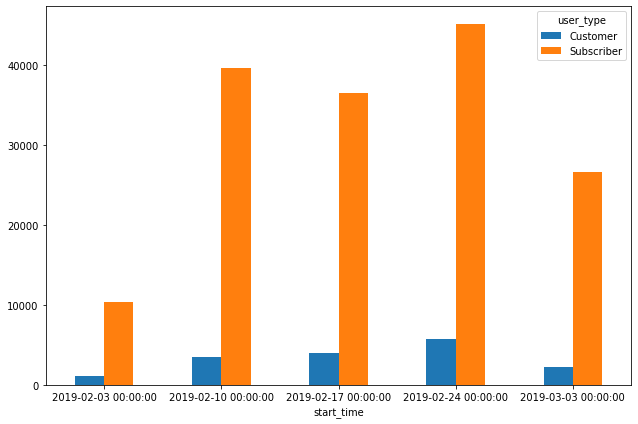

In [81]:
ax = weekly_df.unstack(level=1).plot(y = 'total_bikes', kind='bar', rot=0, figsize=(9, 6))
plt.tight_layout()

In [82]:
s = pd.date_range(bike_clean['start_time'].min(), bike_clean['start_time'].max(), freq='D').to_series()
weekdays_ser = s.dt.dayofweek

In [83]:
weekday_dict = {
    0 : 'Monday',
    1 : 'Tuesday',
    2 : 'Wednesday',
    3 : 'Thursday',
    4 : 'Friday',
    5 : 'Saturday',
    6 : 'Sunday'
}

In [84]:
weekday_dict.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6])

In [85]:
weekdays_list = []
for entry in weekdays_ser:
    if entry in weekday_dict.keys():
        weekdays_list.append(weekday_dict[entry])


In [86]:
len(weekdays_list)

28

In [87]:
time_df['weekday'] = weekdays_list

In [88]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 2019-02-01 to 2019-02-28
Freq: D
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unique_bikes         28 non-null     int64  
 1   total_bikes          28 non-null     int64  
 2   total_trip_time      28 non-null     int64  
 3   total_trip_distance  28 non-null     float64
 4   weekday              28 non-null     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 2.4+ KB


In [89]:
week_day_df = time_df.groupby('weekday').agg(
    total_rentals = ('total_bikes', 'sum')
    )

In [90]:
week_day_df.reset_index(inplace=True)
week_day_df

,weekday,total_rentals
0,Friday,27663
1,Monday,25641
2,Saturday,14414
3,Sunday,14512
4,Thursday,33712
5,Tuesday,30584
6,Wednesday,28426


In [91]:
#converting weekdays into an ordered categorical dtype
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

w_classes = pd.api.types.CategoricalDtype(ordered=True, categories=weekday_order)

week_day_df['weekday'] = week_day_df['weekday'].astype(w_classes)

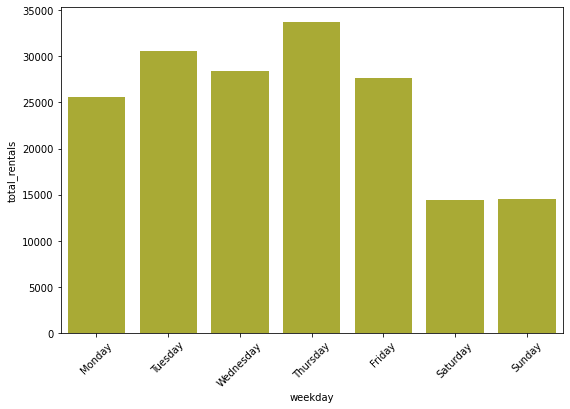

In [92]:
color = sns.color_palette()[8]
plt.figure(figsize=(9,6))
sns.barplot(
    data = week_day_df,
    x = 'weekday',
    y = 'total_rentals',
    color = color
);
plt.xticks(rotation = 45);